## Complaint Categorization

### Text Classification of complaint based on the raw text data


The aim of the project is text classification of complaints based on their description and categories. Based on given text as an input, we have predicted what would be the category. We have different types of categories corresponding to different complaints. We used different machine learning algorithms to get more accurate predictions and choose the most accurate one for our issue. The following classification algorithms have been used: Logistic Regression, Multinomial Naive Bayes, Linear Support Vector Machine (LinearSVM), Random Forest To analysis we used python and their libraries: pandas, matplotlib, NLTK and scikit-learn.

**Dataset**

We have made Use of the Train.csv and Test.csv dataset provided

### Importing packages and loading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report

import pickle
from joblib import dump,load,Parallel, delayed

In [7]:
df = pd.read_csv('data\\train.csv')
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


Shape of data:

In [9]:
df.shape

(93686, 3)

Checking the missing values in data:

In [10]:
df.isnull().sum()

category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

Example description:

In [11]:
df['crimeaditionalinfo'][3]

'In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss'

## Data Cleaning

**Data type change:**

In [12]:
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].astype(str)

In [13]:
print(df['crimeaditionalinfo'].apply(lambda x: len(x.split(' '))).sum())

7284637


In [14]:
print("Unique Categories")
df.category.unique()


Unique Categories


array(['Online and Social Media Related Crime', 'Online Financial Fraud',
       'Online Gambling  Betting',
       'RapeGang Rape RGRSexually Abusive Content',
       'Any Other Cyber Crime', 'Cyber Attack/ Dependent Crimes',
       'Cryptocurrency Crime', 'Sexually Explicit Act',
       'Sexually Obscene material',
       'Hacking  Damage to computercomputer system etc',
       'Cyber Terrorism',
       'Child Pornography CPChild Sexual Abuse Material CSAM',
       'Online Cyber Trafficking', 'Ransomware',
       'Report Unlawful Content'], dtype=object)

In [15]:
print("Unique Sub Categories")
df.sub_category.unique()

Unique Sub Categories


array(['Cyber Bullying  Stalking  Sexting', 'Fraud CallVishing',
       'Online Gambling  Betting', 'Online Job Fraud',
       'UPI Related Frauds', 'Internet Banking Related Fraud', nan,
       'Other', 'Profile Hacking Identity Theft',
       'DebitCredit Card FraudSim Swap Fraud', 'EWallet Related Fraud',
       'Data Breach/Theft', 'Cheating by Impersonation',
       'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
       'FakeImpersonating Profile', 'Cryptocurrency Fraud',
       'Malware Attack', 'Business Email CompromiseEmail Takeover',
       'Email Hacking', 'Hacking/Defacement',
       'Unauthorised AccessData Breach', 'SQL Injection',
       'Provocative Speech for unlawful acts', 'Ransomware Attack',
       'Cyber Terrorism', 'Tampering with computer source documents',
       'DematDepository Fraud', 'Online Trafficking',
       'Online Matrimonial Fraud', 'Website DefacementHacking',
       'Damage to computer computer systems etc', 'Impersonating E

**Lenght of characters:**

In [16]:
df['length'] = df['crimeaditionalinfo'].apply(len)
df.head()

,category,sub_category,crimeaditionalinfo,length
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,258
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,247
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,229
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,538
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,194


## Data analysis

We check proportion of category and sub_category variable:

In [17]:
df.category.value_counts()


category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64

In [18]:
df.sub_category.value_counts()

sub_category
UPI Related Frauds                                                      26856
Other                                                                   10878
DebitCredit Card FraudSim Swap Fraud                                    10805
Internet Banking Related Fraud                                           8872
Fraud CallVishing                                                        5803
Cyber Bullying  Stalking  Sexting                                        4089
EWallet Related Fraud                                                    4047
FakeImpersonating Profile                                                2299
Profile Hacking Identity Theft                                           2073
Cheating by Impersonation                                                1988
Unauthorised AccessData Breach                                           1114
Online Job Fraud                                                          912
DematDepository Fraud                              

C:\Users\abc\AppData\Local\Temp\ipykernel_16632\943372004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')  # Adjust the palette as needed


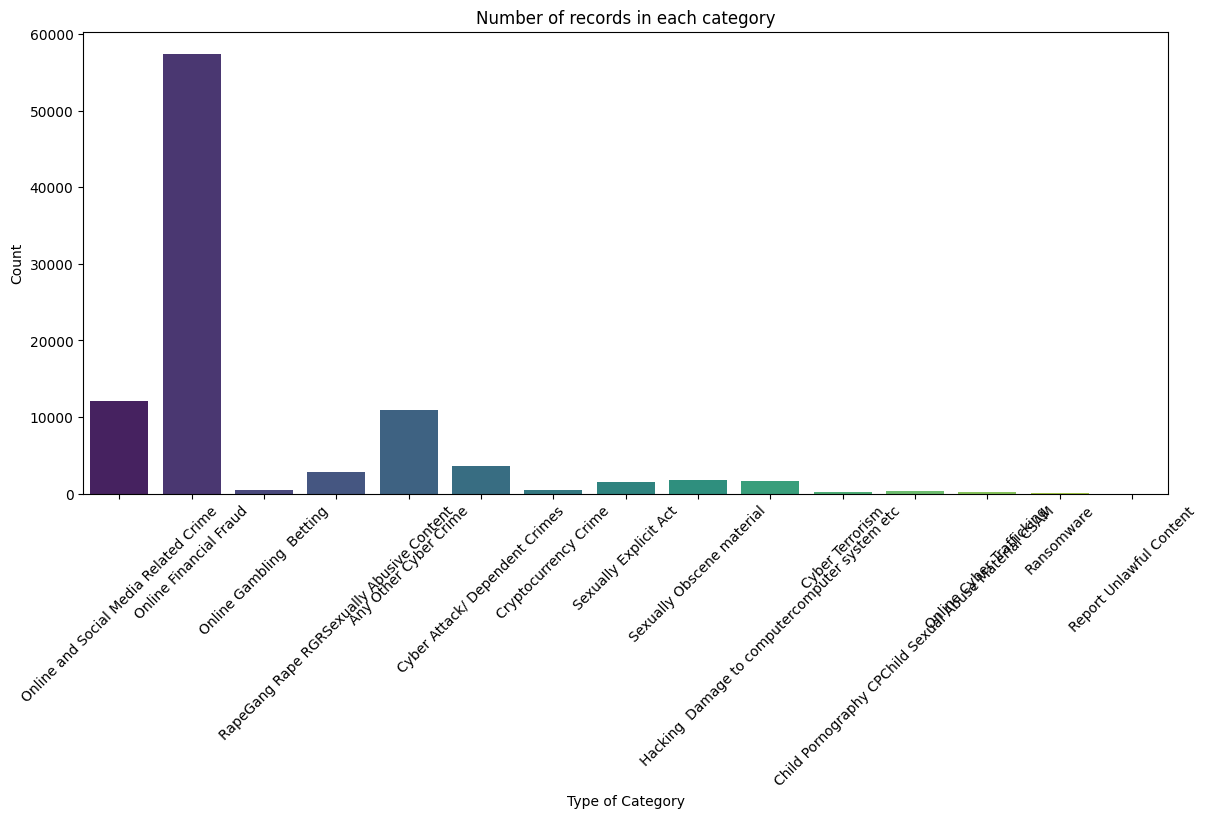

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 6))
sns.countplot(x='category', data=df, palette='viridis')  # Adjust the palette as needed
plt.xlabel('Type of Category')
plt.ylabel('Count')
plt.title('Number of records in each category')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

In [20]:
# Calculate the length of the text in 'crimeaditionalinfo' for the train dataset
train_df = pd.read_csv('data//train.csv')
train_df['text_length'] = train_df['crimeaditionalinfo'].str.len()
print(train_df[['crimeaditionalinfo', 'text_length']].head())



                                  crimeaditionalinfo  text_length
0  I had continue received random calls and abusi...        258.0
1  The above fraudster is continuously messaging ...        247.0
2  He is acting like a police and demanding for m...        229.0
3  In apna Job I have applied for job interview f...        538.0
4  I received a call from lady stating that she w...        194.0


In [21]:
# Calculate the length of the text in 'crimeaditionalinfo' for the test dataset
test_df = pd.read_csv('data//test.csv')
test_df['text_length'] = test_df['crimeaditionalinfo'].str.len()
print(test_df[['crimeaditionalinfo', 'text_length']].head())

                                  crimeaditionalinfo  text_length
0  Sir namaskar  mein Ranjit Kumar PatraPaise neh...        738.0
1          KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT         39.0
2  The issue actually started when I got this ema...        830.0
3  I am amit kumar from karwi chitrakoot I am tot...        134.0
4  I have ordered  saree and  blouse from rinki s...        258.0


In [ ]:
import pandas as pd

# Load your datasets
train_df = pd.read_csv('data//train.csv')
test_df = pd.read_csv('data//test.csv')

# Calculate the length of the text in 'crimeaditionalinfo'
train_df['text_length'] = train_df['crimeaditionalinfo'].str.len()
test_df['text_length'] = test_df['crimeaditionalinfo'].str.len()

# Define a function to categorize lengths
def categorize_length(length):
    if length < 50:
        return 'Short'
    elif 50 <= length < 100:
        return 'Medium'
    else:
        return 'Long'

# Apply the categorization function
train_df['length_category'] = train_df['text_length'].apply(categorize_length)
test_df['length_category'] = test_df['text_length'].apply(categorize_length)

# Display the updated dataframes
print(train_df[['crimeaditionalinfo', 'text_length', 'length_category']].head())
print(test_df[['crimeaditionalinfo', 'text_length', 'length_category']].head())


                                  crimeaditionalinfo  text_length  \
0  I had continue received random calls and abusi...        258.0   
1  The above fraudster is continuously messaging ...        247.0   
2  He is acting like a police and demanding for m...        229.0   
3  In apna Job I have applied for job interview f...        538.0   
4  I received a call from lady stating that she w...        194.0   

  length_category  
0            Long  
1            Long  
2            Long  
3            Long  
4            Long  
                                  crimeaditionalinfo  text_length  \
0  Sir namaskar  mein Ranjit Kumar PatraPaise neh...        738.0   
1          KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT         39.0   
2  The issue actually started when I got this ema...        830.0   
3  I am amit kumar from karwi chitrakoot I am tot...        134.0   
4  I have ordered  saree and  blouse from rinki s...        258.0   

  length_category  
0            Long  
1         

## Text Pre-processing

In this step we have to remove punctuation, stop words, bad characters and so on. The second step is aimed to convertion all of the words to lower case and then stemmed them using the Porter Stemmer in the NLTK package.

**Stemming** operation bundles together words of same root. E.g. stem operation bundles “fishing”,  and “fished” into a common "fish".

The function to clean text, remove stop words and apply stemming operation for each line of text:

In [23]:
# Initialize the stemmer and stop words set
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Ensure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Display the shape of the datasets
print("Training Data Size:", train_df.shape)
print("Testing Data Size:", test_df.shape)

# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Lowercase the text
        text = text.lower()
        
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Tokenization
        tokens = text.split()
        
        # Remove stop words
        tokens = [word for word in tokens if word not in stop_words]
        
        # Stemming
        tokens = [stemmer.stem(word) for word in tokens]
        
        # Join tokens back into a single string
        return ' '.join(tokens)
    else:
        return ''  # Return an empty string for non-string types

# Sample data for quicker testing (uncomment the next two lines for full dataset)
# train_df = train_df.sample(n=1000, random_state=1)
# test_df = test_df.sample(n=1000, random_state=1)

# Timing preprocessing for training data
start_time = time.time()
train_df['cleaned_crime_info'] = train_df['crimeaditionalinfo'].apply(preprocess_text)
print(f"Preprocessing Time for Training Data: {time.time() - start_time:.2f} seconds")

# Timing preprocessing for testing data
start_time = time.time()
test_df['cleaned_crime_info'] = test_df['crimeaditionalinfo'].apply(preprocess_text)
print(f"Preprocessing Time for Testing Data: {time.time() - start_time:.2f} seconds")

# POS tagging function
def pos_tagging(text):
    if text:  # Check if text is not empty
        tokens = word_tokenize(text)  # Tokenize the cleaned text
        return nltk.pos_tag(tokens)     # Perform POS tagging
    return []  # Return an empty list for empty text

# Timing POS tagging for training data
start_time = time.time()
train_df['pos_tags'] = train_df['cleaned_crime_info'].apply(pos_tagging)
print(f"POS Tagging Time for Training Data: {time.time() - start_time:.2f} seconds")

# Timing POS tagging for testing data
start_time = time.time()
test_df['pos_tags'] = test_df['cleaned_crime_info'].apply(pos_tagging)
print(f"POS Tagging Time for Testing Data: {time.time() - start_time:.2f} seconds")

# Display the updated DataFrames with original, cleaned text, and POS tags
print("Training Data Sample with POS Tags:")
print(train_df[['crimeaditionalinfo', 'cleaned_crime_info', 'pos_tags']].head())

print("\nTesting Data Sample with POS Tags:")
print(test_df[['crimeaditionalinfo', 'cleaned_crime_info', 'pos_tags']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training Data Size: (93686, 5)
Testing Data Size: (31229, 5)
Preprocessing Time for Training Data: 53.94 seconds
Preprocessing Time for Testing Data: 17.80 seconds
POS Tagging Time for Training Data: 222.79 seconds
POS Tagging Time for Testing Data: 73.68 seconds
Training Data Sample with POS Tags:
                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                  cleaned_crime_info  \
0  continu receiv random call abus messag whatsap...   
1  fraudster continu messag ask pay money send fa...   
2  act like polic demand money ad section text me...   
3  apna job appli job interview telecal resourc m...   
4  receiv call ladi state send new phone vivo rec...   

                          

### Bag of words

To run machine learning algorithms we need to convert the text files into numerical feature vectors. We will use bag of words model for our analysis. In general we segment each text file into words  and count of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).

More precisely we will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized TF-IDF representation (tf-idf transformer). 


#### CountVectorizer 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer 
count_vectorizer = CountVectorizer()
train_counts = count_vectorizer.fit_transform(train_df['cleaned_crime_info'])
test_counts = count_vectorizer.transform(test_df['cleaned_crime_info'])



# Display the shapes of the result
print("Count Vectorizer Shape for Training Data:", train_counts.shape)
print("Count Vectorizer Shape for Testing Data:", test_counts.shape)


Count Vectorizer Shape for Training Data: (93686, 98928)
Count Vectorizer Shape for Testing Data: (31229, 98928)


In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
# TF-IDF Transformer
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)
test_tfidf = tfidf_transformer.transform(test_counts)

# Display the shapes of the resulting TF-IDF matrices
print("TF-IDF Shape for Training Data:", train_tfidf.shape)
print("TF-IDF Shape for Testing Data:", test_tfidf.shape)


TF-IDF Shape for Training Data: (93686, 98928)
TF-IDF Shape for Testing Data: (31229, 98928)


### Data preparation

Now we split dataset into train and test dataset:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 1: Define your features (X) and target variable (y)
X = train_tfidf  # The TF-IDF feature matrix
y = train_df['category']  

# Step 2: Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Split the data into training and testing sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the shapes of the resulting datasets
print("Training Feature Matrix Shape:", X_train.shape)
print("Testing Feature Matrix Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Feature Matrix Shape: (70264, 98928)
Testing Feature Matrix Shape: (23422, 98928)
Training Target Shape: (70264,)
Testing Target Shape: (23422,)


## Build model

We use different machine learning algorithms to get more accurate predictions and choose the most accurate one for our issue. The used classification models are: Logistic Regression, Multinomial Naive Bayes, Linear Support Vector Machine (LinearSVM) and Random Forest as well.


**Models**

Firstly we calculate each model separately. To evaluate our models we used accuracy score and classification report(precision, recall, F1-score). 

Accuracy is one of the most common classification evaluation metric, i.e. the number of correct predictions made as a ratio of total predictions. 

**1. Logistic Regression**

In [127]:
import joblib


log_model = LogisticRegression(max_iter=1000)  # Create the model

# Fit the model
print("Training the Logistic Regression model...")
log_model.fit(X_train, y_train)

# Make predictions
log_predictions = log_model.predict(X_test)

# Evaluate Logistic Regression
log_accuracy = accuracy_score(y_test, log_predictions)
print(f'Logistic Regression Accuracy: {log_accuracy:.4f}')
print(classification_report(y_test, log_predictions))

joblib.dump(log_model, 'lr_model.pkl')

Training the Logistic Regression model...
Logistic Regression Accuracy: 0.7627
              precision    recall  f1-score   support

           0       0.43      0.24      0.31      2623
           1       0.88      0.26      0.40        81
           2       0.71      0.28      0.40       116
           3       1.00      1.00      1.00       959
           4       0.00      0.00      0.00        44
           5       0.50      0.25      0.33       414
           6       0.00      0.00      0.00        44
           7       0.81      0.95      0.88     14360
           8       0.33      0.01      0.01       133
           9       0.57      0.59      0.58      3049
          10       0.00      0.00      0.00        14
          11       1.00      0.91      0.95       705
          12       0.00      0.00      0.00         1
          13       0.23      0.02      0.04       405
          14       0.40      0.08      0.13       474

    accuracy                           0.76     23422
 

e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['lr_model.pkl']

**2. LinearSVC**

In [128]:
svc_model = LinearSVC()  # Create the model

# Fit the model
print("Training the Support Vector Classifier model...")
svc_model.fit(X_train, y_train)

# Make predictions
svc_predictions = svc_model.predict(X_test)

# Evaluate SVC
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f'SVC Accuracy: {svc_accuracy:.4f}')
print(classification_report(y_test, svc_predictions))

joblib.dump(svc_model, 'svc_model.pkl')

Training the Support Vector Classifier model...


e:\Python\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Accuracy: 0.7577
              precision    recall  f1-score   support

           0       0.40      0.26      0.32      2623
           1       0.76      0.36      0.49        81
           2       0.65      0.41      0.50       116
           3       1.00      1.00      1.00       959
           4       1.00      0.02      0.04        44
           5       0.47      0.23      0.31       414
           6       0.00      0.00      0.00        44
           7       0.82      0.94      0.87     14360
           8       0.80      0.06      0.11       133
           9       0.56      0.56      0.56      3049
          10       0.60      0.21      0.32        14
          11       0.99      0.91      0.95       705
          12       0.00      0.00      0.00         1
          13       0.37      0.08      0.13       405
          14       0.39      0.13      0.19       474

    accuracy                           0.76     23422
   macro avg       0.59      0.34      0.39     23422
weigh

e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['svc_model.pkl']

#### 3. Naive Bayes Classifier 

In [129]:
nbc = MultinomialNB()  # Create the model

# Fit the directly
print("Training the Naive Bayes Classifier model...") 
nbc.fit(X_train, y_train)

# Make predictions 
pred_y = nbc.predict(X_test)

# Evaluate NB
accuracy = accuracy_score(y_test, pred_y)
print(f'Naive Bayes Accuracy: {accuracy:.4f}')
print(classification_report(y_test, pred_y))

joblib.dump(nbc, 'nb_model.pkl')

Training the Naive Bayes Classifier model...
Naive Bayes Accuracy: 0.7120
              precision    recall  f1-score   support

           0       0.61      0.01      0.02      2623
           1       0.00      0.00      0.00        81
           2       0.00      0.00      0.00       116
           3       1.00      1.00      1.00       959
           4       0.00      0.00      0.00        44
           5       0.00      0.00      0.00       414
           6       0.00      0.00      0.00        44
           7       0.70      1.00      0.82     14360
           8       0.00      0.00      0.00       133
           9       0.58      0.24      0.34      3049
          10       0.00      0.00      0.00        14
          11       1.00      0.91      0.95       705
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00       405
          14       0.00      0.00      0.00       474

    accuracy                           0.71     23422
   mac

e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['nb_model.pkl']

**4. Random Forest**

In [130]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # Create the model

# Fit the model
print("Training the Random Forest model...")  
rf_model.fit(X_train, y_train)

# Make predictions 
pred_rf = rf_model.predict(X_test)

# Evaluate RF
accuracy_rf = accuracy_score(y_test, pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(classification_report(y_test, pred_rf))

joblib.dump(rf_model, 'rf_model.pkl')

Training the Random Forest model...
Random Forest Accuracy: 0.7522
              precision    recall  f1-score   support

           0       0.60      0.06      0.12      2623
           1       0.95      0.25      0.39        81
           2       0.83      0.04      0.08       116
           3       1.00      1.00      1.00       959
           4       0.00      0.00      0.00        44
           5       0.78      0.04      0.08       414
           6       0.00      0.00      0.00        44
           7       0.75      0.99      0.86     14360
           8       0.00      0.00      0.00       133
           9       0.61      0.49      0.54      3049
          10       0.00      0.00      0.00        14
          11       1.00      0.91      0.95       705
          12       0.00      0.00      0.00         1
          13       0.90      0.07      0.12       405
          14       0.79      0.09      0.16       474

    accuracy                           0.75     23422
   macro avg 

e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


['rf_model.pkl']

We can write a function to build and calculates our all models as follows:

In [132]:
def get_models(X_train, X_test, y_train, y_test):
    models = pd.DataFrame()
    classifiers = [
        LogisticRegression(max_iter=1000),
        LinearSVC(),
        MultinomialNB(),
        RandomForestClassifier(n_estimators=50)
    ]

    # Identify unseen labels in the test set
    train_classes = set(y_train)
    test_classes = set(y_test)
    unseen_classes = test_classes - train_classes

    if unseen_classes:
        print(f"Unseen classes in the test set: {unseen_classes}")
        # Filter out test samples with unseen labels
        valid_test_indices = [i for i, label in enumerate(y_test) if label in train_classes]
        
        # Keep X_test as sparse, no conversion
        X_test_filtered = X_test[valid_test_indices]  # Keep sparse representation
        y_test_filtered = y_test[valid_test_indices]

        # Train models on filtered data
        for classifier in classifiers:
            pipeline = Pipeline(steps=[
                ('classifier', classifier)
            ])
            pipeline.fit(X_train, y_train)
            score = pipeline.score(X_test_filtered, y_test_filtered)
            param_dict = {
                'Model': classifier.__class__.__name__,
                'Score': score
            }
            models = pd.concat([models, pd.DataFrame(param_dict, index=[0])], ignore_index=True)
    else:
        # If no unseen classes, proceed with regular evaluation
        for classifier in classifiers:
            pipeline = Pipeline(steps=[
                ('classifier', classifier)
            ])
            pipeline.fit(X_train, y_train)
            score = pipeline.score(X_test, y_test)
            param_dict = {
                'Model': classifier.__class__.__name__,
                'Score': score
            }
            models = pd.concat([models, pd.DataFrame(param_dict, index=[0])], ignore_index=True)

    models.reset_index(drop=True, inplace=True)
    print(models.sort_values(by='Score', ascending=False))


In [134]:
get_models(X_train, X_test, y_train, y_test)

Unseen classes in the test set: {12}


e:\Python\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


                    Model     Score
0      LogisticRegression  0.762777
1               LinearSVC  0.757696
3  RandomForestClassifier  0.750352
2           MultinomialNB  0.712053


**Best model**

We have tested several different models and now, we check which one is the best:

In [135]:
# Calculate accuracy for each model
log_acc = accuracy_score(log_predictions, y_test)
svm_acc = accuracy_score(svc_predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
rf_acc = accuracy_score(pred_rf, y_test)

# Create a DataFrame to store the results
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'SVC', 'Naive Bayes', 'Random Forest'],
                      'Score': [log_acc, svm_acc, nb_acc, rf_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.762744
1,SVC,0.757664
3,Random Forest,0.752156
2,Naive Bayes,0.712023


From the above information we can see Logistic Regression is the best model with an accuracy of 76%

### Predictions

We can see some predictions from our model on test example text (crime description).

First we load our trained model:

In [143]:
with open('models\lr_model.pkl', 'rb') as f:
    model = load(f)

We can check the result and predicted class:

In [146]:
# Your input text
new_text = ["Someone hake my instagram id and Facebook id and post my pictures please help me and stop this account Poonam upadhyay name se koi bhi Facebook account nahi chala rahi hu per koi mujhe paresan karne ke liye me picturs ka miss use kar raha hai aur mere friends aur relatives ko friend request bhej raha hai please help imegeat reaction on this account"]

# Transform the new text using the vectorizer
new_text_counts = count_vectorizer.transform(new_text)
new_text_tfidf = tfidf_transformer.transform(new_text_counts)

# Make predictions using the trained model
try:
    prediction = model.predict(new_text_tfidf)
    
    # Convert the predicted label back to the original category name
    predicted_category = label_encoder.inverse_transform(prediction)
    
    # Print the predicted category name
    print("Prediction:", predicted_category[0])
except Exception as e:
    print("An error occurred during prediction:", e)


Prediction: Online and Social Media Related Crime


One can see that our model works well.

## Summary

This project focused on the development of a Natural Language Processing (NLP) model for text classification of complaints based on their descriptions. The primary objective was to create an NLP model that categorizes complaints according to the victim, type of fraud, and other relevant parameters used for text classification.

Utilizing Python and leveraging the scikit-learn and NLTK libraries, we embarked on the project with thorough data engineering and text preprocessing. This process included essential tasks such as removing punctuation and stop words, as well as applying stemming to normalize the data.

We employed a Bag of Words model to convert textual descriptions into numerical feature vectors, enabling us to prepare the data for modeling. To identify the most effective classification algorithm, we experimented with four different models: Logistic Regression, Multinomial Naive Bayes, Linear Support Vector Machine (LinearSVM) and Random Forest.

After evaluating the performance of each model using accuracy scores, we found that the Linear Regression achieved the highest accuracy of 76%, closely followed by the other models.